## Importing Needed packages

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

## Reading the data in

In [5]:
df = pd.read_csv("concrete_data.csv")
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Understanding the Data

In [9]:
cdf = df[["cement","water","coarse_aggregate","concrete_compressive_strength","fine_aggregate","age","blast_furnace_slag"]]
cdf.describe()

,cement,water,coarse_aggregate,concrete_compressive_strength,fine_aggregate,age,blast_furnace_slag
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,181.567282,972.918932,35.817961,773.580485,45.662136,73.895825
std,104.506364,21.354219,77.753954,16.705742,80.175980,63.169912,86.279342
min,102.000000,121.800000,801.000000,2.330000,594.000000,1.000000,0.000000
25%,192.375000,164.900000,932.000000,23.710000,730.950000,7.000000,0.000000
50%,272.900000,185.000000,968.000000,34.445000,779.500000,28.000000,22.000000
75%,350.000000,192.000000,1029.400000,46.135000,824.000000,56.000000,142.950000
max,540.000000,247.000000,1145.000000,82.600000,992.600000,365.000000,359.400000


## Plotting the Dataset

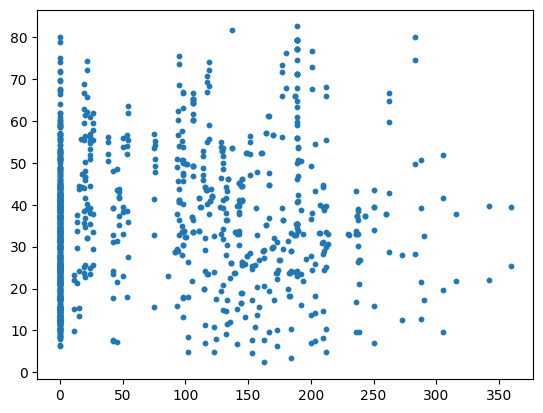

In [10]:
plt.scatter(cdf.blast_furnace_slag,cdf.concrete_compressive_strength, s=10)

## Creating train and test dataset

In [11]:
msk = np.random.rand(len(df))<.8
train=cdf[msk]
test=cdf[~msk]

## Polynomial regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[["cement"]])
train_y = np.asanyarray(train[["concrete_compressive_strength"]])

test_x = np.asanyarray(test[["cement"]])
test_y = np.asanyarray(test[["concrete_compressive_strength"]])

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 5.40000000e+02, 2.91600000e+05, 1.57464000e+08],
       [1.00000000e+00, 5.40000000e+02, 2.91600000e+05, 1.57464000e+08],
       [1.00000000e+00, 3.32500000e+02, 1.10556250e+05, 3.67599531e+07],
       ...,
       [1.00000000e+00, 1.48500000e+02, 2.20522500e+04, 3.27475912e+06],
       [1.00000000e+00, 1.59100000e+02, 2.53128100e+04, 4.02726807e+06],
       [1.00000000e+00, 2.60900000e+02, 6.80688100e+04, 1.77591525e+07]],
      shape=(817, 4))

## Coefficient and Intercept

In [13]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly,train_y)
print("Coefficients: ",clf.coef_)
print("Intercept: : ", clf.intercept_)

Coefficients:  [[ 0.00000000e+00  7.57711972e-02  1.21118739e-05 -8.68133937e-09]]
Intercept: :  [13.66229224]


## Plot

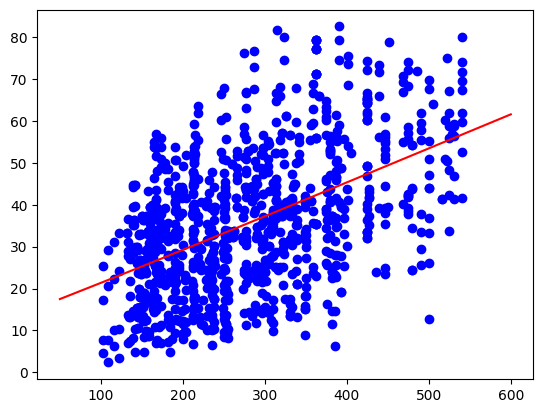

In [14]:
plt.scatter(cdf.cement , cdf.concrete_compressive_strength, color="blue")
XX = np.arange(50.0,600.0,0.01)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX,2) + clf.coef_[0][3]*np.power(XX,3)
plt.plot(XX,yy, "-r")

## Evaluation

In [15]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)
print("Residual sum of squares : %.2f" % np.mean((test_y_ - test_y)**2))
print("Mean absolute error : %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("R2_Score : %.2f" % r2_score(test_y,test_y_))


Residual sum of squares : 217.14
Mean absolute error : 12.20
R2_Score : 0.23
